<a href="https://colab.research.google.com/github/kanishk16/Stepping-Up-with-CV/blob/master/Face_Detector_Day_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OpenCV ships out-of-the-box to detect faces with:
* Haar Cascades 
* Deep learning based face detector(OpenCV >= 3.3) - Not suitable for Raspberry Pi devices
> - based on Single Shot Detector(SSD) framework with a ResNet base network unlike other OpenCV SSDs that typically use MobileNet as the base network


In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# version check
cv.__version__

'3.4.3'

In [0]:
## Creating a function to download img from a url specified by the USER
import urllib.request as urlrequest

def dl_img(url, file_path, file_name):
  _path = file_path + file_name + '.jpg'
  urlrequest.urlretrieve(url, _path)
  
url = input("URL: ")
saveas = input("File Name: ")

dl_img(url, '/content/', saveas)

* SystemExit:2 while parsing Cmd-line arg in iPython?
> argparse - module designed to parse the arguments passed from the command line
  ```$ python my_programme.py --arg1=5 --arg2=7 ```

  > argparse interprets the --arg1=5 --arg2=7 but if argparse finds the arguments are invalid, it exits, which in general is done in python by calling sys.exit() which raises the SystemExit error.

  > Since the execution of the program starts and args already been parsed, argparse from an interactive interpreter results in SytemExit.

NOTE: To try - create a separate python file such as my_programme.py and run it using python from a command line 

In [2]:
# Parsing cmd-line arg
import argparse

# constructing the argument parse
ap = argparse.ArgumentParser()

# parse the args
ap.add_argument("-i", "--image", required=True, help="path to input image")
ap.add_argument("-p", "--prototxt", required=True, help="path to Caffe 'deploy' prototxt file")
ap.add_argument("-m", "--model", required=True, help="path to Caffe pre-trained model")
ap.add_argument("-c", "--confidence", type=float, default=0.5, help="minimum probability to filter weak detections")

args = vars(ap.parse_args())

help(vars())

usage: ipykernel_launcher.py [-h] -i IMAGE -p PROTOTXT -m MODEL
                             [-c CONFIDENCE]
ipykernel_launcher.py: error: the following arguments are required: -i/--image, -p/--prototxt, -m/--model


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
# Load the serialized model
nn = cv.dnn.readNetFromCaffe('/content/deploy.prototxt.txt','/content/res10_300x300_ssd_iter_140000.caffemodel')

print(nn)

<dnn_Net 0x7fd6c19dbd10>


In [0]:
# Load the image
img = cv.imread('iron_chic.jpg')

# Construct an input blob - resizing + normalizing
# extracting H n W
h,w = img.shape[:2]
# print(h,w)

blob = cv.dnn.blobFromImage(cv.resize(img, (300,300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

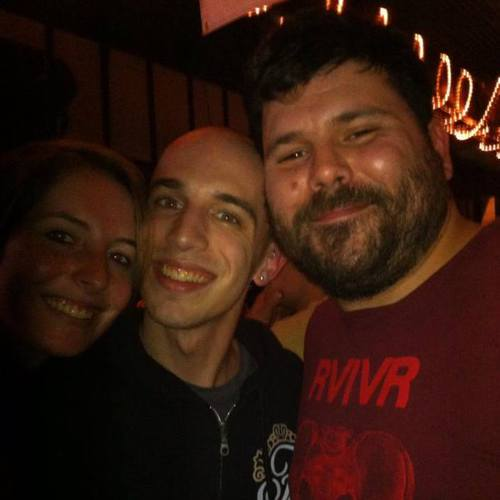

TypeError: ignored

In [14]:
from google.colab.patches import cv2_imshow as cv_imshow

cv_imshow(img)

cv_imshow(blob)

In [20]:
# Set-up input
nn.setInput(blob)

# Feed-forward to detect faces
preds = nn.forward()

# Sanity Check
print(preds.shape)

(1, 1, 107, 7)


In [27]:
prob = preds[0,0,0,2]

print(prob)

0.9997495


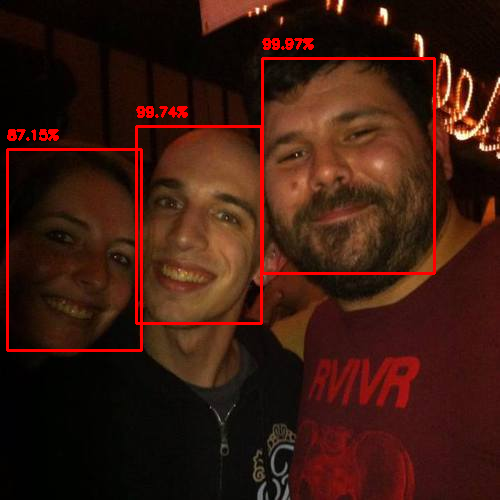

In [31]:
# Looping over detections
for i in range(preds.shape[2]):

  # extract probability associated with the preds
  prob = preds[0,0,i,2]

  # filter out weak pred
  if prob > 0.5:

    # compute (x,y) for the bounding box of the box
    bbox = preds[0,0,i,3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = bbox.astype("int")

    # draw the bounding box of the face along with the associated probability
    text = "{:.2f}%".format(prob * 100)
    y = startY - 10 if startY - 10 > 10 else startY + 10

    cv.rectangle(img, (startX, startY), (endX, endY), (0, 0, 255), 2)
    cv.putText(img, text, (startX, y), cv.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
 
# show the output image
cv_imshow(img) 